<H1><center>Градиентный бустинг</center></H1>

<H4>Цель</H4>

Предсказание оттока абонентов по имеющемуся набору данных при помощи модели XGBoost

<H4>Задачи</H4>

- Освоение методов считывания и обработки табличных данных в формате csv
- Ознакомление с метриками эффективности решения accuracy и ROC AUC
- Подбор параметров и обучение модели XGBoost

<H4>Обозначения</H4>

\[1] ⭐ - Задание (звездочки - баллы, число - номер задания)  
\[1] 💫 - Конец задания

<H2>1. Входные данные</H2>

В данной лабораторной работе мы столкнемся с главной задачей всех методов машинного обучения - обработкой данных  
Поэтому начнем с рассмотрения того, какие данные нам доступны 

Все входные файлы с данными лежат в директории <code>data</code>  
Можете открыть ее и посмотреть содержимое, но лучше сделаем это как настоящие программисты

In [1]:
import os

cur_dir = os.path.abspath('.')                               # полный путь к текущей директории
data_dir = os.path.join(cur_dir, 'data')                     # путь к поддиректории data

for dirname, subdirnames, filenames in os.walk(data_dir):    # рекурсивный обход всего файлового дерева внутри data_dir
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\хуепутало\Desktop\учёба\Jupyter-py3.8\projects\lab1\data\sample_submission.csv
C:\Users\хуепутало\Desktop\учёба\Jupyter-py3.8\projects\lab1\data\test.csv
C:\Users\хуепутало\Desktop\учёба\Jupyter-py3.8\projects\lab1\data\train.csv
C:\Users\хуепутало\Desktop\учёба\Jupyter-py3.8\projects\lab1\data\trained_example.csv


<br>Теперь мы знаем, что в <code>data</code> лежат 4 файла:
- train.csv - данные для тренировки модели
- test.csv - данные для тестирования модели
- sample_submission.csv - пример выходного файла для тестового набора данных
- trained_example.csv - пример выходного файла для тренировочного набора данных

<H3>1.1. Считывание</H3>

Посмотрим для начала, как устроен csv файл, на примере <code>train.csv</code>

In [2]:
train_file = os.path.join(data_dir, 'train.csv')

with open(train_file, 'r') as f:        # открываем файл на чтение ('r')
                                        # f - переменная, указывающая на объект открытого файла
                                        # далее идет выделенный отступами блок кода, в котором этот файл доступен
                                        # при выходе из блока файл закрывается автоматически, и переменная f удаляется из текущего пространства имен
    lines = list(f)

lines[:6]       # выведем первые 6 строк файла

['id,Leave_Next_Month,Gender,Pensioner,Married,Children,Months_with_company,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Type_contract,Paperless_Billing,Payment_Method,Monthly_Payment,Total_Payment\n',
 '104,1,F,0,N,N,2,Y,N,Fiber optic,N,N,N,N,N,N,Per_month,Y,Check_electron,70.7,151.65\n',
 '107,0,F,0,N,N,10,N,No_phone,DSL,Y,N,N,N,N,N,Per_month,N,Check_mailed,29.75,301.9\n',
 '108,1,F,0,Y,N,28,Y,Y,Fiber optic,N,N,Y,Y,Y,Y,Per_month,Y,Check_electron,104.8,3046.05\n',
 '109,0,M,0,N,Y,62,Y,N,DSL,Y,Y,N,N,N,N,Year-1,N,Bank_transfer_auto,56.15,3487.95\n',
 '111,0,M,0,N,N,16,Y,N,N,No_internet,No_internet,No_internet,No_internet,No_internet,No_internet,Year-2,N,Credit_card_auto,18.95,326.8\n']

<br>По сути в csv файле записана таблица  
Строки таблицы разделены переносом строки, а ячейки внутри строки - запятыми  
В первой строке записаны заголовки, в остальных - данные

Используем функцию <code>read_csv</code> из модуля <code>pandas</code>, чтобы считать тот же файл в нормальную структуру данных

In [3]:
import pandas as pd

train = pd.read_csv(train_file)

print(type(train))    # посмотрим тип данных считанной таблицы
train.head(5)         # выведем первые 5 строк

<class 'pandas.core.frame.DataFrame'>


,id,Leave_Next_Month,Gender,Pensioner,Married,Children,Months_with_company,Phone_Service,Multiple_Lines,Internet_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Type_contract,Paperless_Billing,Payment_Method,Monthly_Payment,Total_Payment
0,104,1,F,0,N,N,2,Y,N,Fiber optic,...,N,N,N,N,N,Per_month,Y,Check_electron,70.70,151.65
1,107,0,F,0,N,N,10,N,No_phone,DSL,...,N,N,N,N,N,Per_month,N,Check_mailed,29.75,301.90
2,108,1,F,0,Y,N,28,Y,Y,Fiber optic,...,N,Y,Y,Y,Y,Per_month,Y,Check_electron,104.80,3046.05
3,109,0,M,0,N,Y,62,Y,N,DSL,...,Y,N,N,N,N,Year-1,N,Bank_transfer_auto,56.15,3487.95
4,111,0,M,0,N,N,16,Y,N,N,...,No_internet,No_internet,No_internet,No_internet,No_internet,Year-2,N,Credit_card_auto,18.95,326.80


<br>Лучше? Лучше!  
Теперь с нашими данными можно работать

<center>[1] ⭐</center>

Считайте таким же образом таблицу из файла <code>test.csv</code> и положите ее в переменную test  
Выведите первые 3 строки

In [4]:
test_file = os.path.join(data_dir, 'test.csv')

test = pd.read_csv(test_file)


train.head(3) 

,id,Leave_Next_Month,Gender,Pensioner,Married,Children,Months_with_company,Phone_Service,Multiple_Lines,Internet_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Type_contract,Paperless_Billing,Payment_Method,Monthly_Payment,Total_Payment
0,104,1,F,0,N,N,2,Y,N,Fiber optic,...,N,N,N,N,N,Per_month,Y,Check_electron,70.70,151.65
1,107,0,F,0,N,N,10,N,No_phone,DSL,...,N,N,N,N,N,Per_month,N,Check_mailed,29.75,301.90
2,108,1,F,0,Y,N,28,Y,Y,Fiber optic,...,N,Y,Y,Y,Y,Per_month,Y,Check_electron,104.80,3046.05


<center>[1] 💫</center>

<H3>1.2. Анализ</H3>

Проведем небольшое исследование имеющихся данных

<center>[2] ⭐</center>

Для начала вспомним, чем тренировочные данные отличаются от тестовых

Тренировочные данные преднозначены для обучения машины. Тестовые данные предназначены для проверки машины.

<center>[2] 💫</center>

Теперь посмотрим, какие заголовки есть в таблицах <code>train</code> и <code>test</code>

In [5]:
print('Список заголовков в train.csv:', list(train.columns.values))
print('')
print('Список заголовков в test.csv:', list(test.columns.values))

Список заголовков в train.csv: ['id', 'Leave_Next_Month', 'Gender', 'Pensioner', 'Married', 'Children', 'Months_with_company', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Type_contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Payment', 'Total_Payment']

Список заголовков в test.csv: ['id', 'Gender', 'Pensioner', 'Married', 'Children', 'Months_with_company', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Type_contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Payment', 'Total_Payment']


<br>Заметим, что в <code>test.csv</code> отсутствует заголовок <code>Leave_Next_Month</code>  
Это и есть параметр, значение которого должна будет предсказывать наша модель  

Остальные параметры (кроме id) будут использоваться для обучения  
Запишем их сразу в переменную features

In [6]:
features = list(test.columns.values)
features.remove('id')

features

['Gender',
 'Pensioner',
 'Married',
 'Children',
 'Months_with_company',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Type_contract',
 'Paperless_Billing',
 'Payment_Method',
 'Monthly_Payment',
 'Total_Payment']

<br>Посмотрим статистику по отдельному параметру  

In [7]:
feature = 'Gender'

values = train[feature]        # берем все значения таблицы из столбца 'Gender'
values

0       F
1       F
2       F
3       M
4       M
       ..
3516    M
3517    F
3518    M
3519    F
3520    M
Name: Gender, Length: 3521, dtype: object

In [8]:
train[feature].dtype           # проверяем тип данных (в разных столбцах могут быть разные типы!)

dtype('O')

In [9]:
train[feature].describe()      # смотрим краткую статистику

count     3521
unique       2
top          F
freq      1811
Name: Gender, dtype: object

In [10]:
train[feature].unique()        # смотрим уникальные значения

array(['F', 'M'], dtype=object)

<center>[3] ⭐</center>

Теперь выведите то же самое для всех параметров в таблице <code>train</code> (кроме id)  
Список уникальных значений выводите в том случае, если тип данных - <code>object</code>

In [11]:
values = train[features]
values
for f in features:
    print(train[f].dtype)
    print(train[f].describe())
    if train[f].dtype==object:
        print(train[f].unique())

object
count     3521
unique       2
top          F
freq      1811
Name: Gender, dtype: object
['F' 'M']
int64
count    3521.000000
mean        0.159898
std         0.366563
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Pensioner, dtype: float64
object
count     3521
unique       2
top          N
freq      1828
Name: Married, dtype: object
['N' 'Y']
object
count     3521
unique       2
top          N
freq      2482
Name: Children, dtype: object
['N' 'Y']
int64
count    3521.000000
mean       32.391082
std        24.687193
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: Months_with_company, dtype: float64
object
count     3521
unique       2
top          Y
freq      3194
Name: Phone_Service, dtype: object
['Y' 'N']
object
count     3521
unique       3
top          N
freq      1680
Name: Multiple_Lines, dtype: object
['N' 'No_phone' 'Y']
object
count            

<center>[3] 💫</center>

<H3>1.3. Кодирование</H3>

Как вы уже поняли, в таблице могут быть данные не только числовых типов  
В нашем случае в некоторых столбцах содержатся данные о принадлежности абонента к какому-либо классу  
Например, столбец Gender, который мы рассмотрели отдельно, делит абонентов на 2 класса: M и F

Для корректной работы модели эти классы необходимо представить в числовом виде  
Воспользуемся <code>LabelEncoder</code> из модуля <code>sklearn</code>

In [12]:
from sklearn.preprocessing import LabelEncoder

feature = 'Gender'

le = LabelEncoder()                                                    # создаем объект LabelEncoder
le.fit(list(train[feature].values) + list(test[feature].values))       # подаем ему полный список данных, которые необходимо закодировать числами
train[feature] = le.transform(train[feature].values)                   # переписываем данные в тренировочной таблице в числовом виде
test[feature] = le.transform(test[feature].values)                     # переписываем данные в тестовой таблице в числовом виде
le.classes_                                                            # выводим исходный список классов

array(['F', 'M'], dtype='<U1')

<center>[4] ⭐</center>

То же самое необходимо сделать для всех данных типа <code>object</code> в таблицах <code>train</code> и <code>test</code>

In [13]:
for f in features:
    if train[f].dtype=='object' and test[f].dtype=='object':
        re = LabelEncoder()
        re.fit(list(train[f].values)+list(test[f].values))
        train[f] = re.transform(train[f].values)                   # переписываем данные в тренировочной таблице в числовом виде
        test[f] = re.transform(test[f].values)
        re.classes_
        print(test[f])

0       1
1       0
2       0
3       0
4       0
       ..
3517    0
3518    0
3519    0
3520    1
3521    0
Name: Married, Length: 3522, dtype: int32
0       0
1       0
2       0
3       0
4       0
       ..
3517    0
3518    0
3519    0
3520    1
3521    0
Name: Children, Length: 3522, dtype: int32
0       0
1       1
2       1
3       0
4       1
       ..
3517    1
3518    1
3519    1
3520    1
3521    1
Name: Phone_Service, Length: 3522, dtype: int32
0       1
1       0
2       0
3       1
4       2
       ..
3517    2
3518    2
3519    0
3520    2
3521    0
Name: Multiple_Lines, Length: 3522, dtype: int32
0       0
1       0
2       0
3       0
4       1
       ..
3517    1
3518    1
3519    2
3520    1
3521    1
Name: Internet_Service, Length: 3522, dtype: int32
0       0
1       2
2       2
3       2
4       0
       ..
3517    0
3518    2
3519    1
3520    0
3521    2
Name: Online_Security, Length: 3522, dtype: int32
0       2
1       0
2       2
3       0
4       0
       

<center>[4] 💫</center>

<H2>2. Выходные данные</H2>

Перейдем к тому, что мы должны получить на выходе

<H3>2.1. Формат</H3>

Как вы уже поняли, работать будем с форматом csv, поэтому выходной файл также нужно записать в формате csv  
Для этого у класса <code>DataFrame</code> есть метод <code>to_csv</code>

In [14]:
output_dir = os.path.join(cur_dir, 'outputs')
os.makedirs(output_dir, exist_ok=True)               # создаем директорию outputs, если ее еще нет

dummy_file = os.path.join(output_dir, 'dummy.csv')
train.to_csv(dummy_file)                             # записываем тренировочную таблицу в dummy.csv

<br>Теперь определимся, что конкретно должно храниться в выходной таблице

<center>[5] ⭐</center>

Откройте файл <code>sample_submission.csv</code> и изучите его  
Запишите в <code>dummy.csv</code> те же столбцы из таблицы <code>train</code>  

<i>Подсказка: вытащить из таблицы несколько столбцов можно так же, как и один, если название параметра заменить списком названий</i>

In [15]:

dummy_file = os.path.join(output_dir, 'dummy1.csv')
test[["id", "Gender"]].to_csv(dummy_file)

dummy = pd.read_csv(dummy_file)
dummy.head()


,Unnamed: 0,id,Gender
0,0,100,0
1,1,101,1
2,2,102,1
3,3,103,1
4,4,105,0


<center>[5] 💫</center>

<H3>2.2. Метрики</H3>

Выходные данные модели нужно как-то оценивать - иначе мы не поймем, хорошо ли она обучилась  
Разберемся для начала, что собой представляют наши выходные данные

Помните цель лабораторной работы? По имеющимся табличным данным обученная модель должна предсказывать отток абонентов  
То есть для каждого входного набора (абонента) будет ровно одно значение, показывающее, откажется он от услуг связи в следующем месяце или нет  
Однако модель XGBoost предназначена для решения задач линейной регрессии, а не классификации  
Это означает, что на выходе мы получим не нули и единицы, а значения из интервала \[0; 1]

Рассмотрим пример выходных данных модели, представленный в <code>trained_example.csv</code>  
Для удобства в этой таблице приведены также реальные значения, с которыми нужно сравнивать предсказанные

In [16]:
output_file = os.path.join(data_dir, 'trained_example.csv')
output = pd.read_csv(output_file)

real_values = output['real']
predicted_values = output['predicted']

print(real_values)
print(predicted_values)

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
3516    0.0
3517    0.0
3518    0.0
3519    0.0
3520    1.0
Name: real, Length: 3521, dtype: float64
0       0.628940
1       0.217250
2       0.459837
3       0.083132
4       0.055535
          ...   
3516    0.490289
3517    0.135952
3518    0.130134
3519    0.267984
3520    0.618623
Name: predicted, Length: 3521, dtype: float64


<br>Представим эти значения на графике, где на горизонтальной оси отложены предсказанные значения, а на вертикальной - реальные

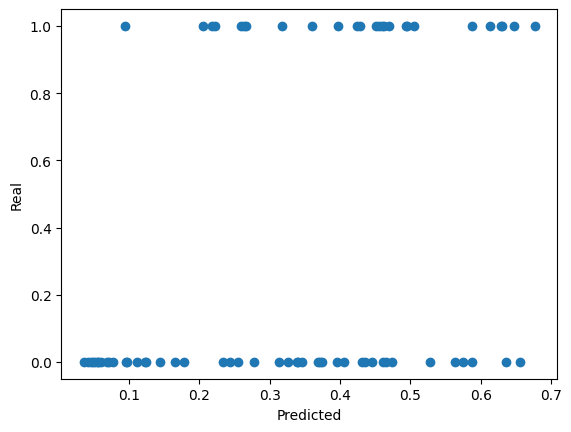

In [17]:
import matplotlib.pyplot as plt

plt.ylabel('Real')
plt.xlabel('Predicted')
plt.scatter(predicted_values[::50], real_values[::50])          # для визуализации берем только часть точек, чтобы они не сливались в сплошную линию

<br>По вертикальной оси точки разделились на 2 четкие категории по реальным значениям параметра: 1 для верхних, 0 для нижних  
По горизонтальной оси четкого разделения нет, что уже говорит о низкой эффективности решения  
Тем не менее, в среднем нижние точки находятся левее, т.е. имеют меньшее предсказанное значение, а значит, представленное решение лучше случайного

Но насколько оно лучше случайного? И как сравнить его с другими решениями?  
Для ответов на эти вопросы существуют специальные метрики - численные показатели эффективности

Самая простая метрика - <code>accuracy</code> (точность)  
Она представляет собой процент совпадения предсказанных значений с реальными

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score

predicted_rounded = np.round(predicted_values)      # округляем предсказанные значения
accuracy_score(real_values, predicted_rounded)

0.8017608633910821

<br>Точность решения 80% - неплохо, но можно и лучше!

В примере выше мы воспользовались правилами округления для предсказанных значений и приравняли значения меньше 0.5 к 0, а остальные к 1  
Но можно использовать и другую пороговую точку

In [19]:
threshold = 0.45
predicted_rounded = np.zeros(len(predicted_values))      # инициализируем массив "округленных" значений нулями
predicted_rounded[predicted_values > threshold] = 1      # меняем нули на единицы, когда предсказанные значения больше порога

accuracy_score(real_values, predicted_rounded)

0.8077250781028117

<br>Получается, что точность зависит от порогового значения  
А где есть зависимость, должен быть и график

<center>[6] ⭐⭐</center>

Постройте график зависимости <code>accuracy</code> от <code>threshold</code> для данного решения  
Меняйте <code>threshold</code> от 0 до 1 с шагом 0.01

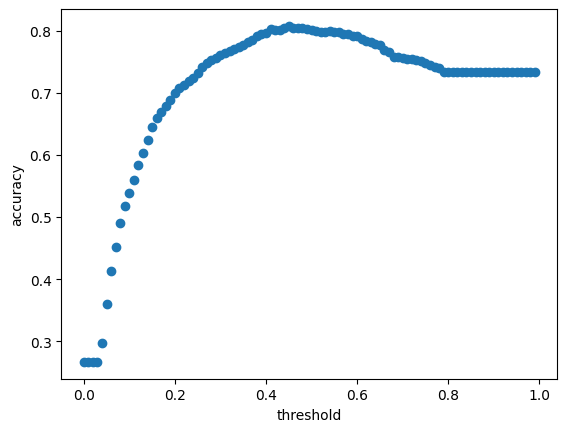

In [20]:
plt.ylabel('accuracy')
plt.xlabel('threshold')

accuracy = list()
t=list()
for i in range(0,100):
    threshold = i/100
    predicted_rounded = np.zeros(len(predicted_values))
    predicted_rounded[predicted_values > threshold] = 1
    t.append(threshold)
    accuracy.append(accuracy_score(real_values,predicted_rounded))

plt.scatter(t, accuracy)

<center>[6] 💫</center>

В реальности для оценки решений часто используется другая кривая - <code>ROC</code>  
По горизонтальной оси откладывается число ложноположительных (false positive) результатов, а по вертикальной - число истинно положительных (true positive)  
Точки на графике также строятся при различных значениях порога

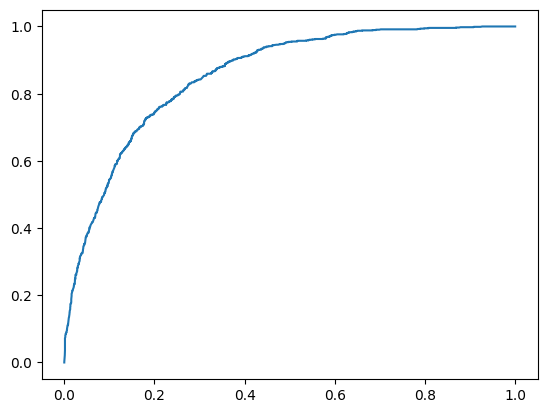

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(real_values, predicted_values)      # Используем уже исходные значения, не округленные!
plt.plot(fpr, tpr)

<br>Чем ближе кривая к 1 по вертикальной оси, тем лучше предсказанные значения соответствуют реальным  
Чтобы дать этому численную оценку, используют метрику <code>ROC AUC</code>, т.е. площадь под кривой ROC  

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(real_values, predicted_values)

0.855536898772447

<H2>3. Модель</H2>

Перейдем к главной части - обучению самой модели 

<H3>3.1. Параметры</H3>

Начнем с установки параметров обучения

In [37]:
import xgboost as xgb

params_xgb = {
    "objective": "binary:logistic",     # вид предсказываемого значения, в данном случае бинарное
    "eval_metric": 'auc',               # метрика эффективности
    "eta": 0.01,                        # коэффициент скорости обучения
    "max_depth": 2,                     # максимальная глубина (высота) дерева
    "subsample": 0.7,                   # размер выборки для тренировки 
    "colsample_bytree": 0.8,            # доля параметров, используемых при создании дерева
}

num_boost_round = 70                    # количество итераций
early_stopping_rounds = 10              # количество итераций без улучшения результата для ранней остановки

<H3>3.2. Обучение</H3>

Для обучения разделим размеченный набор данных на тренировочный и валидационный

In [38]:
from sklearn.model_selection import train_test_split

target = 'Leave_Next_Month'

if target in features:
    features.remove(target)        # удаляем значение, которое нужно предсказать, из списка параметров обучения, иначе модель будет использовать его же для предсказания

train_split, valid = train_test_split(train, test_size=0.3)       # разделяем в соотношении 70/30

<br>Представим тренировочный и валидационный наборы в виде <code>DMatrix</code>, чтобы XGBoost мог с ними работать

In [39]:
dtrain = xgb.DMatrix(train_split[features].values, train_split[target].values)
dvalid = xgb.DMatrix(valid[features].values, valid[target].values)

<br>И наконец, проведем само обучение

In [40]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params_xgb, dtrain, num_boost_round, evals=watchlist,
                early_stopping_rounds=early_stopping_rounds, verbose_eval=10)       # gbm - обученная модель

[0]	train-auc:0.77507	eval-auc:0.77334
[10]	train-auc:0.83566	eval-auc:0.82591
[20]	train-auc:0.83761	eval-auc:0.83027
[30]	train-auc:0.83915	eval-auc:0.83042
[40]	train-auc:0.83948	eval-auc:0.83115
[49]	train-auc:0.84014	eval-auc:0.83067


<H3>3.3. Применение</H3>

Теперь используем обученную модель для предсказания  
Воспользуемся еще раз валидационным набором

In [41]:
pred = gbm.predict(dvalid, iteration_range = (0, gbm.best_iteration + 1))
pred

array([0.34291726, 0.46726152, 0.47843406, ..., 0.4618847 , 0.34291726,
       0.44028872], dtype=float32)

<br>Модель возвращает список предсказанных значений для входных данных  
Сравним эти значения с теми, которые мы хотели получить

In [42]:
real = valid[target].values
accuracy = accuracy_score(real, np.round(pred))
auc = roc_auc_score(real, pred)
print('Accuracy: {:.2f} %, ROC AUC: {:.2f}'.format(100*accuracy, auc))

Accuracy: 79.19 %, ROC AUC: 0.83


<center>[7] ⭐⭐</center>

Примените эту же модель к тестовым данным  
Запишите результаты (обратитесь к файлу <code>sample_submission.csv</code> за форматом записи)  

<i>Прим.: придется погуглить, как объединить список id и список предсказанных значений в новый DataFrame</i>

In [43]:
import xgboost as xgb

params_xgb = {
    "objective": "binary:logistic",     # вид предсказываемого значения, в данном случае бинарное
    "eval_metric": 'auc',               # метрика эффективности
    "eta": 0.01,                        # коэффициент скорости обучения
    "max_depth": 2,                     # максимальная глубина (высота) дерева
    "subsample": 0.8,                   # размер выборки для тренировки 
    "colsample_bytree": 0.8,            # доля параметров, используемых при создании дерева
}

num_boost_round = 70                    # количество итераций
early_stopping_rounds = 10              # количество итераций без улучшения результата для ранней остановки


from sklearn.model_selection import train_test_split

target = 'Leave_Next_Month'

 

valid = test



dvalid = xgb.DMatrix(valid[features].values)

pred = gbm.predict(dvalid, iteration_range = (0, gbm.best_iteration+1))
print(len(pred), len(train))

df = pd.DataFrame(data = {'id':test['id']})
df['Leave_Next_Month'] = pred.tolist()


dummy_file = os.path.join(output_dir, 'dummy1.csv')
df.to_csv(dummy_file, index = False)


dummy = pd.read_csv(dummy_file)
dummy.head()


3522 3521


,id,Leave_Next_Month
0,100,0.470966
1,101,0.360487
2,102,0.419510
3,103,0.354050
4,105,0.520323


<center>[7] 💫</center>

In [2]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Фактические значения
actual = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1])
# Предсказания
predictions = np.array([1, 1, 7, 8, 12, 9, 10, 3, 14])

# Рассчитываем ROCAUC
rocauc = roc_auc_score(actual, predictions)
print("ROCAUC:", rocauc)

ROCAUC: 0.675
